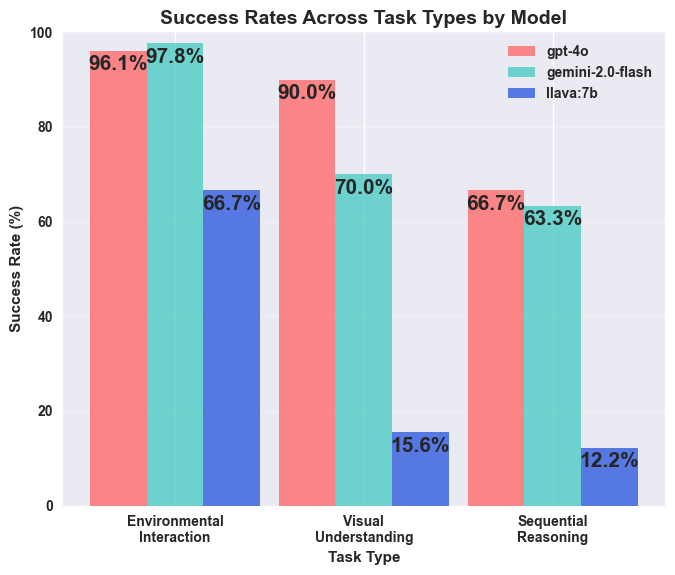

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style for better aesthetics
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

font = {'weight' : 'bold',
    'size'   : 15}

plt.rc('font', **font)

# Read the data
df = pd.read_csv('data.csv')

# Add percentage columns for proper comparison
df['Success Rate Numeric'] = df['Success Rate'].str.rstrip('%').astype(float)
df['Total'] = df['Success'] + df['Failure'] + df['Error']
df['Success Percentage'] = (df['Success'] / df['Total'] * 100)

# Create figure with single subplot - reduced width
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

# Color scheme
model_colors = {'gpt-4o': '#FF6B6B', 'gemini-2.0-flash': '#4ECDC4', 'llava:7b': '#305CDE',}

# Performance Across Task Complexity
types_ordered = ['ENVIRONMENTAL_INTERACTION', 'VISUAL_UNDERSTANDING', 'SEQUENTIAL_REASONING']
bar_width = 0.3
x = np.arange(len(types_ordered))

# Track model data for bar positioning
model_data_dict = {}

for i, model in enumerate(df[df['Type'] != 'OVERALL']['Model'].unique()):
    model_data = df[(df['Model'] == model) & (df['Type'] != 'OVERALL')]
    success_rates = []
    
    for task_type in types_ordered:
        task_row = model_data[model_data['Type'] == task_type].iloc[0]
        success_rates.append(task_row['Success Percentage'])
    
    # Plot success rates as bars
    position = x + (i- 1) * bar_width
    bars = ax.bar(position, success_rates, bar_width, label=model, 
        color=model_colors[model], alpha=0.8)
    
    # Add percentage labels on top of bars
    for bar, rate in zip(bars, success_rates):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() -5,
            f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Task Type', fontweight='bold')
ax.set_ylabel('Success Rate (%)', fontweight='bold')
ax.set_title('Success Rates Across Task Types by Model', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(['Environmental\nInteraction', 'Visual\nUnderstanding', 'Sequential\nReasoning'])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()